# Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## Data Description

* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Driving_License: 0 : Customer does not have driving license, 1 : Customer already has driving license
* Region_Code: Unique code for the region of the customer
* Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* Vehicle_Age: Age of the Vehicle
* Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* Annual_Premium: The amount customer needs to pay as premium in the year
* PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response: 1 : Customer is interested, 0 : Customer is not interested

## Data Exploration

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
health_insurance_train = pd.read_csv("health_insurance_train.csv")
health_insurance_test = pd.read_csv("health_insurance_test.csv")
train = health_insurance_train.copy()
test = health_insurance_test.copy()
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
print("Train Row :", train.shape[0], " | Train Column : ", train.shape[1])
print("*"*40)
print("Test Row :", test.shape[0], " | Test Column : ", test.shape[1])

Train Row : 381109  | Train Column :  12
****************************************
Test Row : 127037  | Test Column :  11


In [5]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


The data in Region_Code and Policy_Sales_Channel is in floats, but the actual values are integers, so they will be converted to int. This will make it easier to convert them to dummy variables later.

In [7]:
for column in ['Region_Code','Policy_Sales_Channel']:
    train[column] = train[column].astype('int')
    test[column] = test[column].astype('int')

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [9]:
train.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [10]:
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
for category in categorical_columns:
    print(train[category].value_counts(), '\n_________________________\n')

Male      206089
Female    175020
Name: Gender, dtype: int64 
_________________________

1    380297
0       812
Name: Driving_License, dtype: int64 
_________________________

0    206481
1    174628
Name: Previously_Insured, dtype: int64 
_________________________

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 
_________________________

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 
_________________________

0    334399
1     46710
Name: Response, dtype: int64 
_________________________



### Observations:
* The customers range in age from 20 to 85 years old, and half of them are 25-49
* Half of the customers in this dataset have been with the company for 82 to 227 days
* A slight majority are male
* The vast majority have a driving license, about 99.8%
* Most vehicles are <2 years old
* Over half of vehicles have damage of some kind
* Only a little over 1 in 10 customers responded by buying vehicle insurance when asked

## Data Cleaning

### 1. Removing Duplicates

In [11]:
train[train.duplicated() == True]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35754,Male,23,1,15,0,< 1 Year,No,2630.0,152,173,0
41515,Male,39,1,30,0,1-2 Year,Yes,2630.0,124,27,0
43618,Male,40,1,28,1,1-2 Year,No,2630.0,124,209,0
44049,Male,39,1,28,0,1-2 Year,Yes,2630.0,124,64,0
44203,Male,44,1,28,0,> 2 Years,Yes,2630.0,124,155,1
...,...,...,...,...,...,...,...,...,...,...,...
379273,Male,58,1,30,1,1-2 Year,No,2630.0,152,150,0
379451,Male,41,1,30,0,1-2 Year,Yes,2630.0,156,111,0
379788,Male,38,1,28,1,1-2 Year,No,2630.0,124,42,0
380673,Female,37,1,28,0,1-2 Year,Yes,2630.0,156,176,0


In [12]:
test[test.duplicated() == True]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
25784,Male,39,1,28,0,1-2 Year,Yes,2630.0,124,194
25835,Male,39,1,28,0,1-2 Year,Yes,2630.0,124,194
40720,Male,58,1,28,0,1-2 Year,Yes,2630.0,26,114
46052,Male,43,1,3,0,1-2 Year,Yes,2630.0,124,137
46969,Female,29,1,18,1,< 1 Year,No,2630.0,152,113
48374,Male,52,1,29,0,1-2 Year,Yes,2630.0,26,271
49103,Female,24,1,47,1,< 1 Year,No,2630.0,152,68
55973,Male,26,1,28,1,< 1 Year,No,2630.0,152,107
64625,Female,23,1,37,0,< 1 Year,Yes,2630.0,152,201
66454,Male,42,1,28,0,1-2 Year,Yes,2630.0,124,214


In [13]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

### 2. Filling Missing Values

In [14]:
def count_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    dtype = data.dtypes
    missing_data = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
    return missing_data

In [15]:
count_missing_data(train)

,Total,Percent,Data Type
Response,0,0.0,int64
Vintage,0,0.0,int64
Policy_Sales_Channel,0,0.0,int32
Annual_Premium,0,0.0,float64
Vehicle_Damage,0,0.0,object
Vehicle_Age,0,0.0,object
Previously_Insured,0,0.0,int64
Region_Code,0,0.0,int32
Driving_License,0,0.0,int64
Age,0,0.0,int64


There's no missing data in our dataset.

## Exploratory Data Analysis

In [16]:
def plot_object(col, palette, hue='Response'):
    plt.figure(figsize=(10,8))
    sns.countplot(col, hue=train[hue], palette=palette)
    plt.show()

In [17]:
palette = ['Accent', 'Blues', 'BrBG', 'BuGn', 'CMRmap','BuPu', 
           'Dark2', 'Greens', 'OrRd', 'PRGn', 'GnBu', 'Paired', 
           'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn']

### Gender

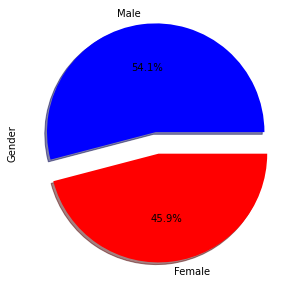

In [18]:
train['Gender'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(8,5), colors=['blue','red']);

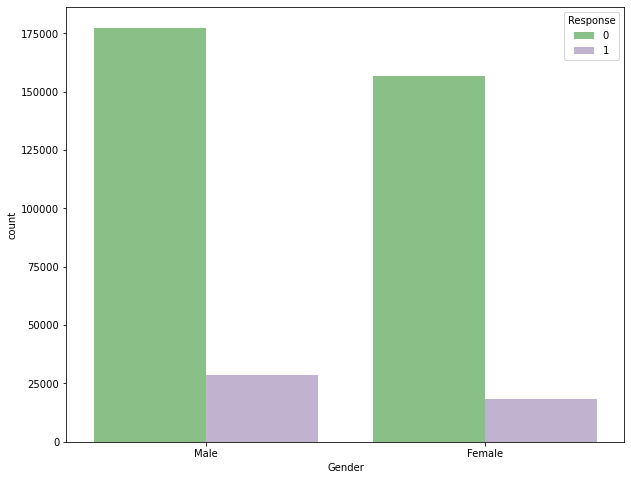

In [19]:
plot_object(train['Gender'], palette[0])

Gender makes little difference to response, but it will be included in the models.

### Vehical Age

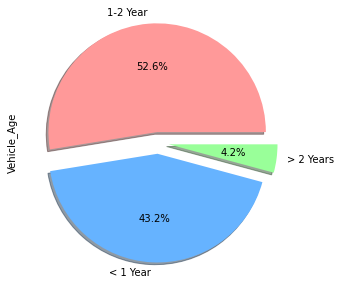

In [20]:
colors = ['#ff9999','#66b3ff','#99ff99']
train['Vehicle_Age'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(8,5), colors=colors);

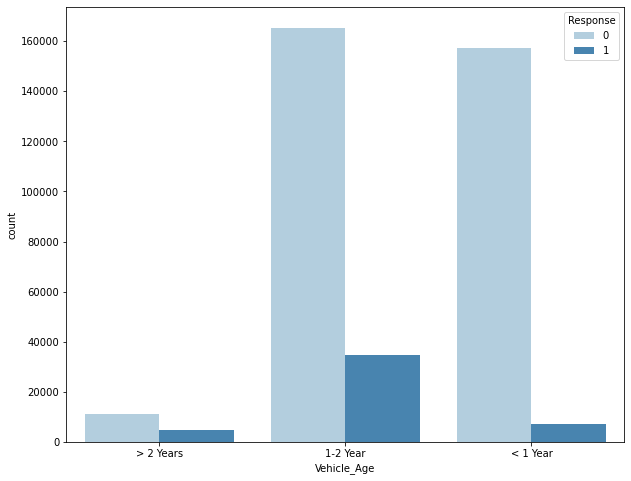

In [21]:
plot_object(train['Vehicle_Age'], palette[1])

From graph we see that people having vehicles 1-2 years old have taken insurance and overall very less number of people have shown interest in taking insurance, most of them have not taken insurance.

### Vehical Damage

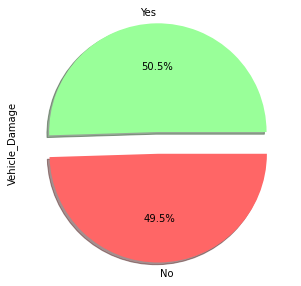

In [22]:
colors = ['#99ff99', '#ff6666']
train['Vehicle_Damage'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(8,5), colors=colors);

In [23]:
train['Vehicle_Damage'].value_counts()

Yes    192277
No     188563
Name: Vehicle_Damage, dtype: int64

In [24]:
df = pd.DataFrame({'total': train['Vehicle_Damage'].value_counts(), 
                 'Response=1':train.loc[train['Response'] == 1,'Vehicle_Damage'].value_counts()})
df['Response Rate'] = df['Response=1'] / df['total']
df

,total,Response=1,Response Rate
Yes,192277,45703,0.237694
No,188563,982,0.005208


* Customers with damage are far more interested in vehicle insurance.

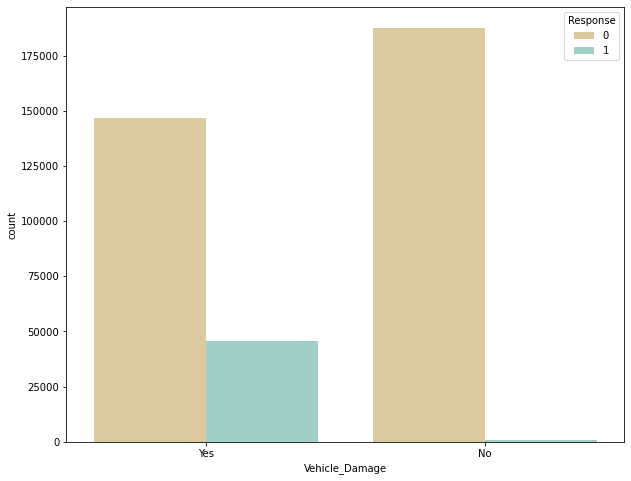

In [25]:
plot_object(train['Vehicle_Damage'], palette[2])

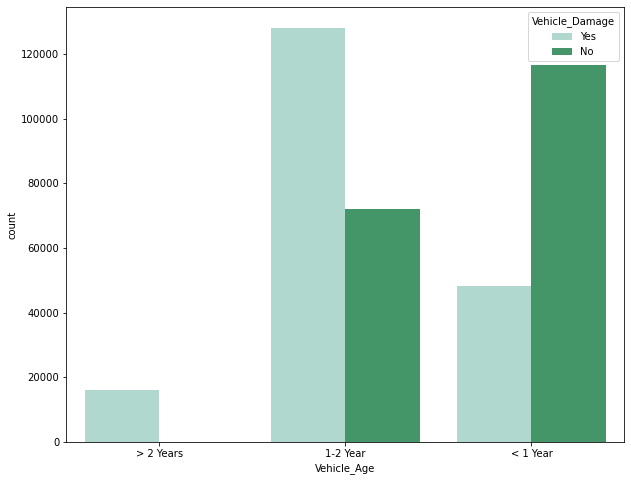

In [26]:
plot_object(train['Vehicle_Age'], palette[3], hue='Vehicle_Damage')

Vehicles 1-2 years old have more damages.

### Driving_License

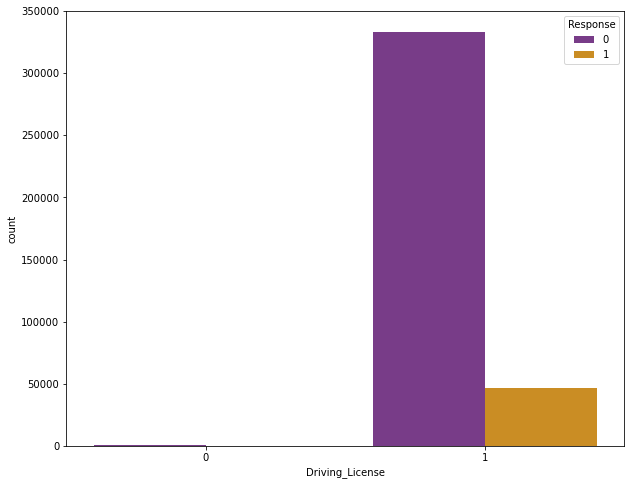

In [27]:
plot_object(train['Driving_License'], palette[4])

In [28]:
train['Driving_License'].value_counts()

1    380028
0       812
Name: Driving_License, dtype: int64

### Region_Code

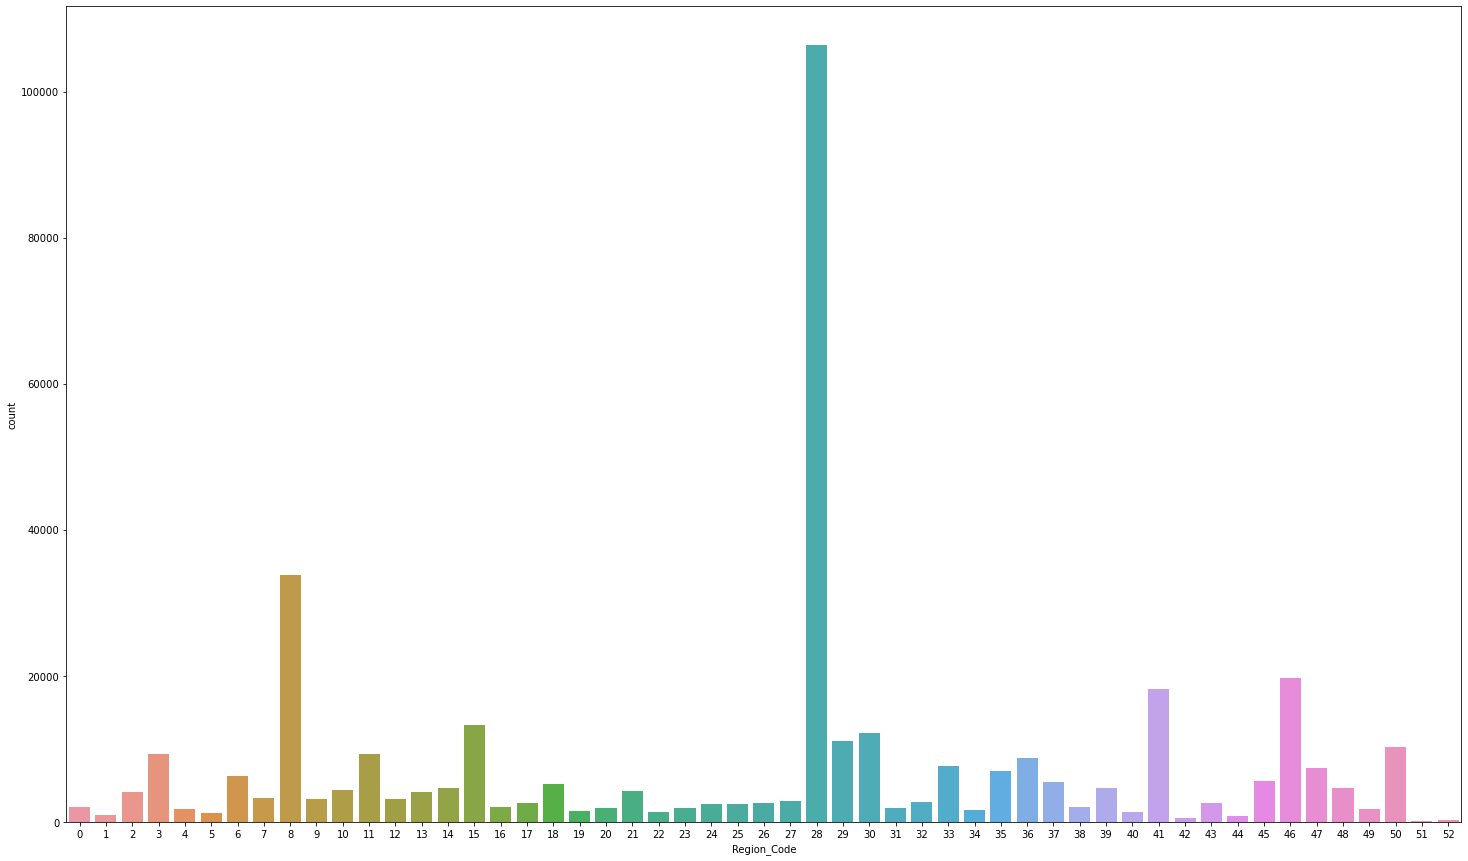

In [29]:
plt.figure(figsize=(25, 15))
sns.countplot("Region_Code",data = train)
plt.show()

Seems like a huge percentage of people are in region 28.

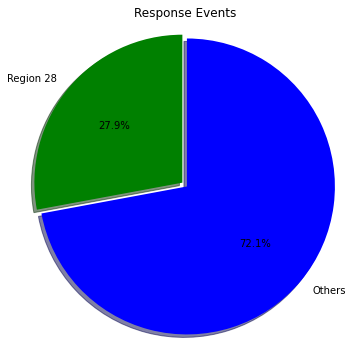

In [30]:
labels ='Region 28', 'Others'
sizes = [len(train[train['Region_Code']==28]),len(train[train['Region_Code']!=28])]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=('g','b'), startangle=90)
ax1.set_title("Response Events")
ax1.axis('equal') 

plt.show()

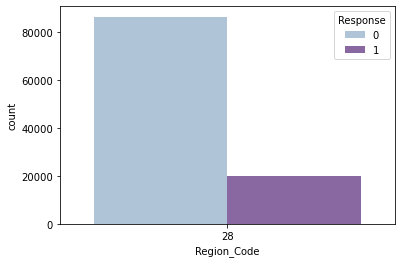

In [31]:
region = train[train["Region_Code"] == 28.0]
sns.countplot(x="Region_Code",hue="Response",data=region, palette=palette[5]);

### Policy Sales Channel

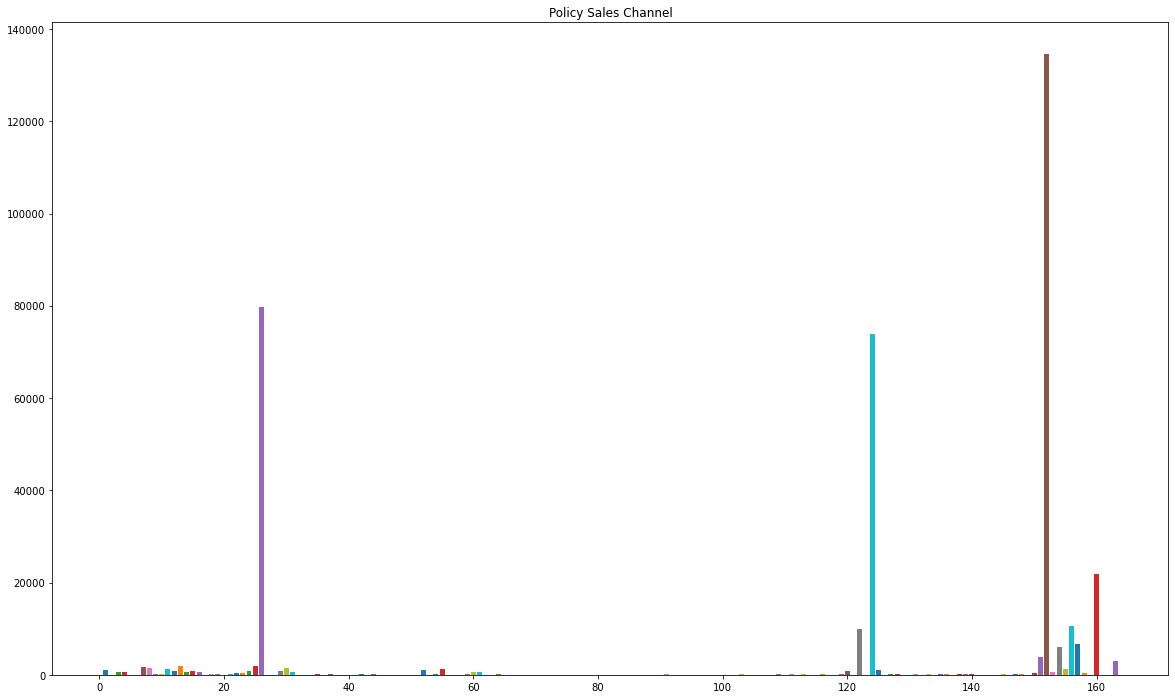

In [32]:
plt.figure(figsize=(20,12))
plt.title('Policy Sales Channel')

for i in sorted(train['Policy_Sales_Channel'].unique()):
    bar= plt.bar(i,len(train[train['Policy_Sales_Channel']==i]))

### Previously_Insured

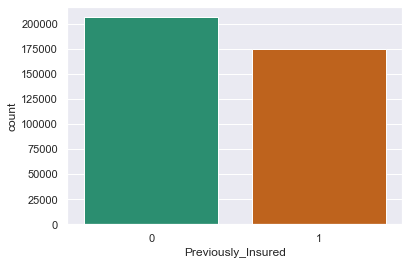

In [33]:
sns.set(font_scale=1)
sns.countplot(train['Previously_Insured'], palette=palette[6]);

In [34]:
train['Previously_Insured'].value_counts()

0    206336
1    174504
Name: Previously_Insured, dtype: int64

There are more number of customers who have no previous insurance policy.

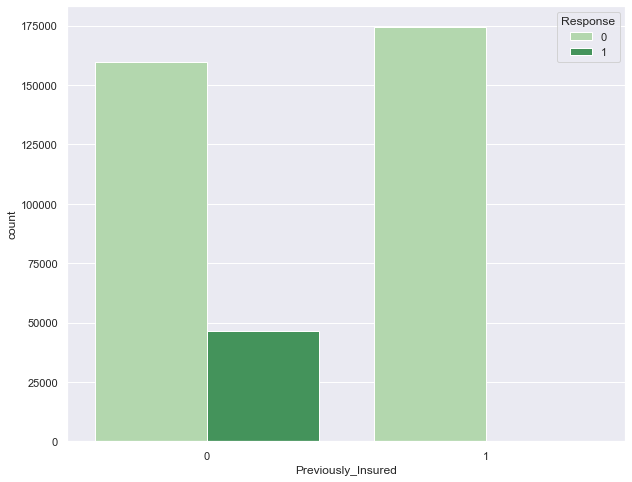

In [35]:
plot_object(train['Previously_Insured'], palette[7])

### Target Value - Response

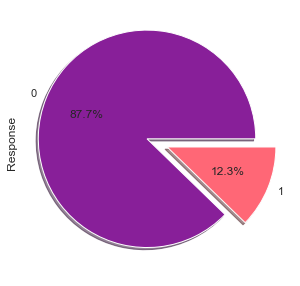

In [36]:
colors = ['#881f99', '#ff6776']
train['Response'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(8,5), colors=colors);

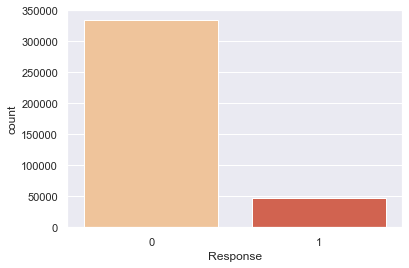

In [37]:
sns.countplot(train['Response'], palette=palette[8]);

We can see that the dataset is highly imbalanced.

In [38]:
train['Response'].value_counts()

0    334155
1     46685
Name: Response, dtype: int64

In [39]:
train.Response.value_counts()[1]/(train.Response.value_counts()[1]+train.Response.value_counts()[0])

0.1225842873647726

* Only 12% of 380840 customers purchase the additional vehicle insurance when offered. 

### Age

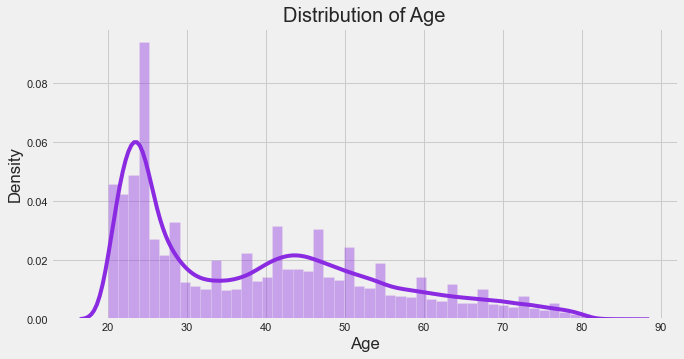

In [40]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(train['Age'], color = 'BlueViolet')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

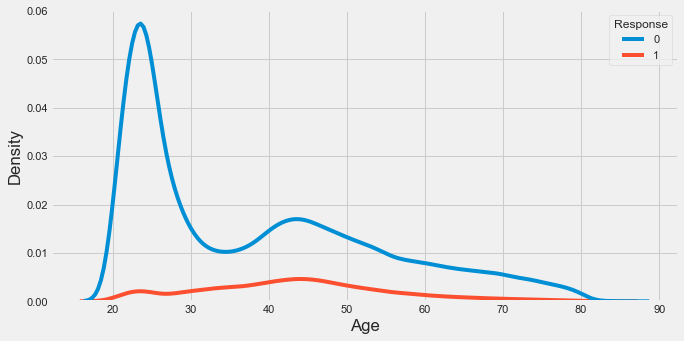

In [41]:
sns.kdeplot(data=train, x='Age', hue='Response')
plt.show()

Age group of 40-50 have higher chance of buying the health insurance

### Annual_Premium

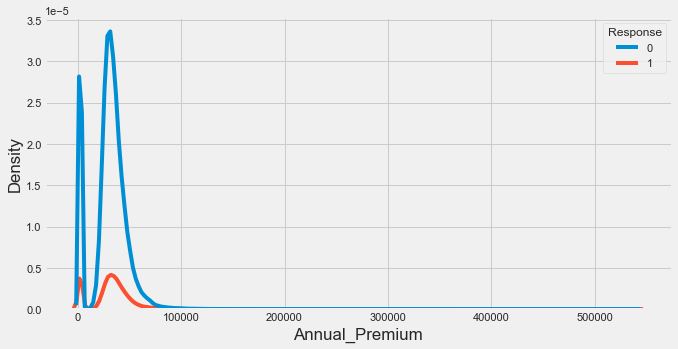

In [42]:
sns.kdeplot(data=train, x='Annual_Premium', hue='Response')
plt.show()

### Vintage

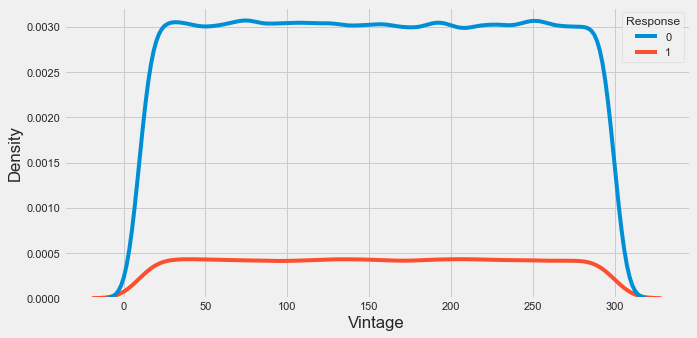

In [43]:
sns.kdeplot(data=train, x='Vintage', hue='Response')
plt.show()

## RELATIONSHIPS BETWEEN VARIABLES

### Age - Gender

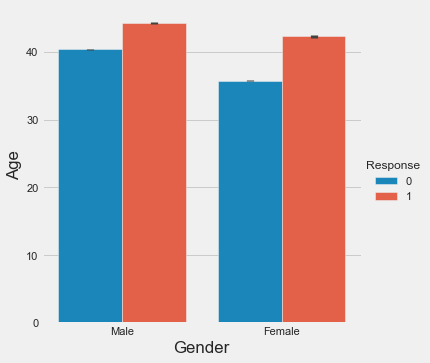

In [44]:
sns.catplot(x='Gender', y='Age', hue = 'Response', kind = 'bar', data = train);

More males have taken insurance as compared to females.

### Gender - Driving License

In [45]:
gender_dl = train.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(gender_dl)

   Gender  Driving_License
0  Female           174902
1    Male           205938


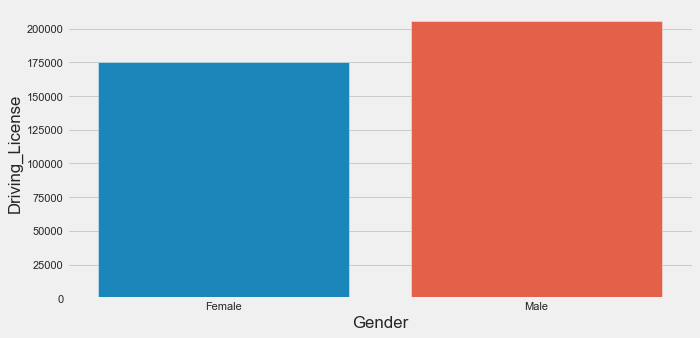

In [46]:
sns.barplot(x = gender_dl["Gender"], y = gender_dl["Driving_License"]);

More number of males have driving license.

### Previously Insured - Gender

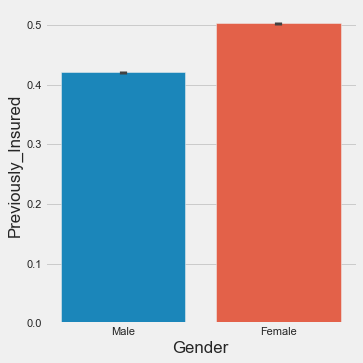

In [47]:
sns.catplot(x='Gender', y='Previously_Insured', kind = 'bar', data = train);

More number of females have vehicle insurance.

### Vehicle Age - Annual Premium

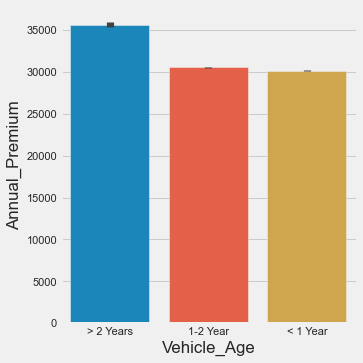

In [48]:
sns.catplot(x='Vehicle_Age', y='Annual_Premium', kind = 'bar', data = train);

People who have vehicle older than 2 years pay more annual premium

### Age - Annual Premium

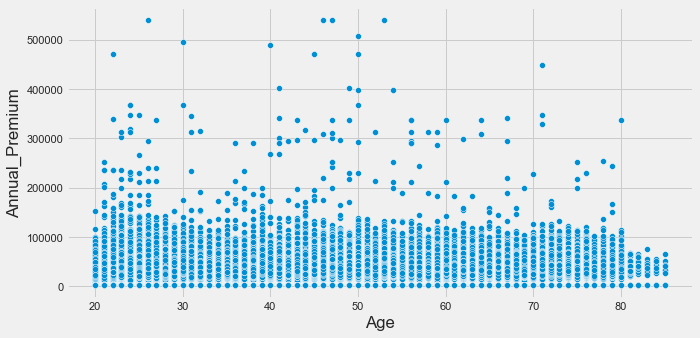

In [49]:
sns.scatterplot(x=train['Age'], y=train['Annual_Premium']);

### Vehicle Age - Vehicle Damage

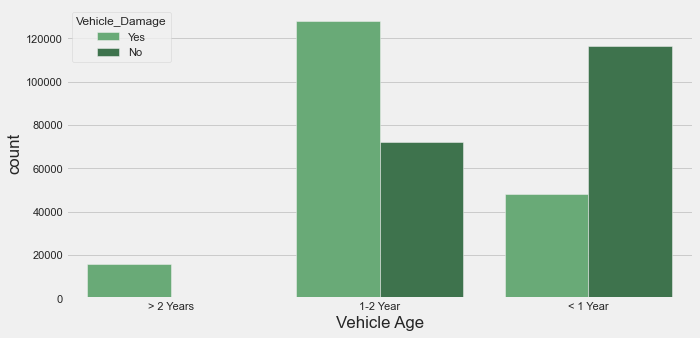

In [50]:
sns.countplot(x="Vehicle_Age", hue="Vehicle_Damage", data=train, palette="Greens_d")
plt.xlabel("Vehicle Age")
plt.show()

### Vintage - Annual Premium

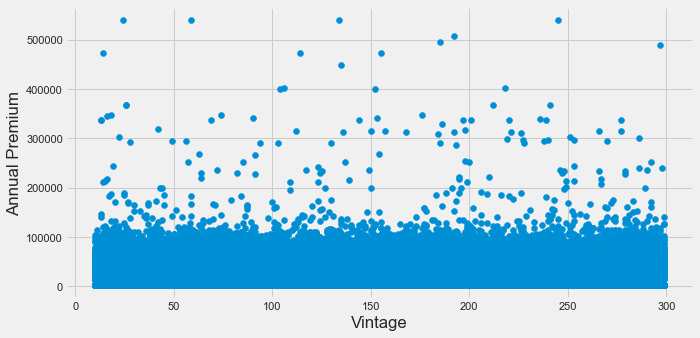

In [51]:
plt.scatter(train["Vintage"], train["Annual_Premium"])
plt.xlabel("Vintage")
plt.ylabel("Annual Premium")
plt.show()

### Vintage - Previously Insured

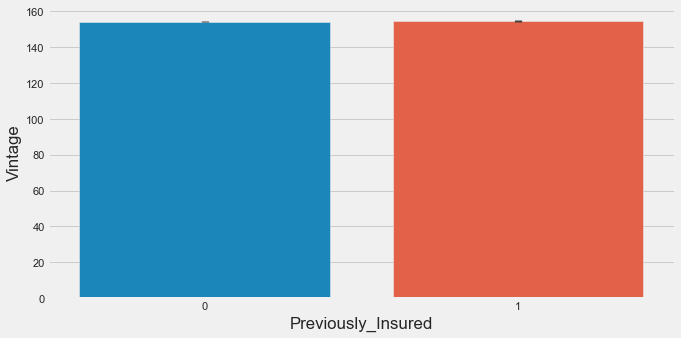

In [52]:
sns.barplot(train["Previously_Insured"], train["Vintage"]);

### Policy Sales Channel - Annual Premium

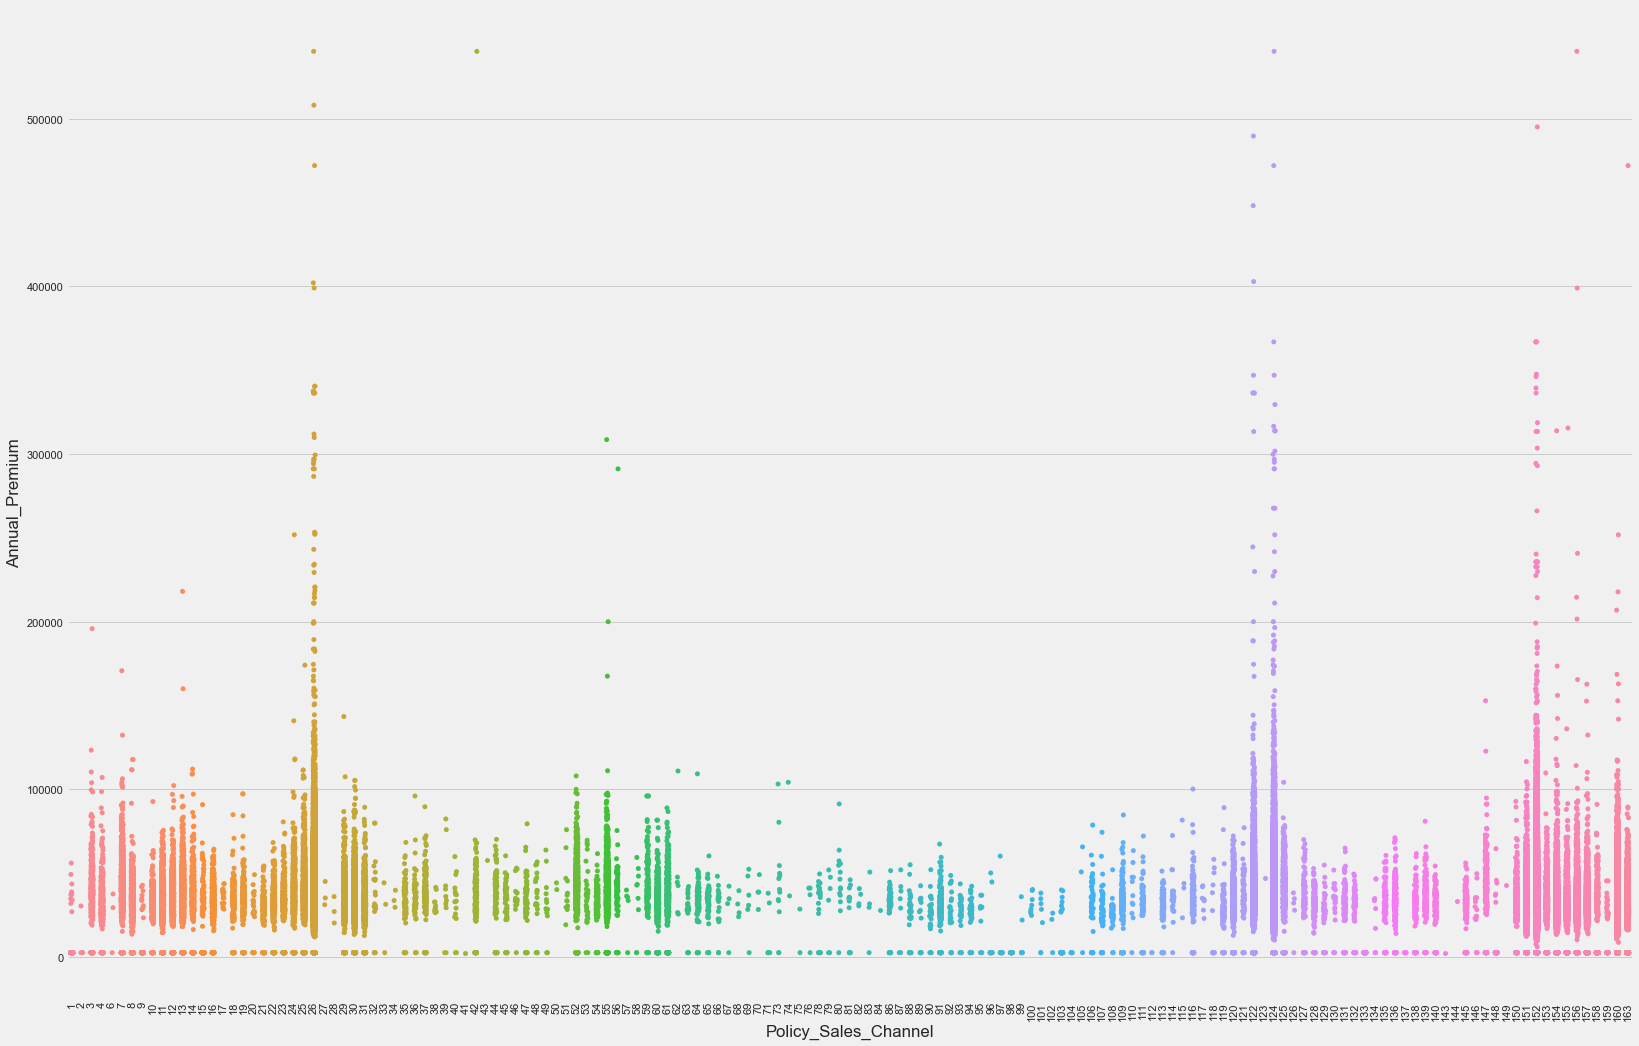

In [53]:
plt.figure(figsize=(25, 17))
plt.xticks(rotation=90)
sns.stripplot(x="Policy_Sales_Channel", y="Annual_Premium", data=train);

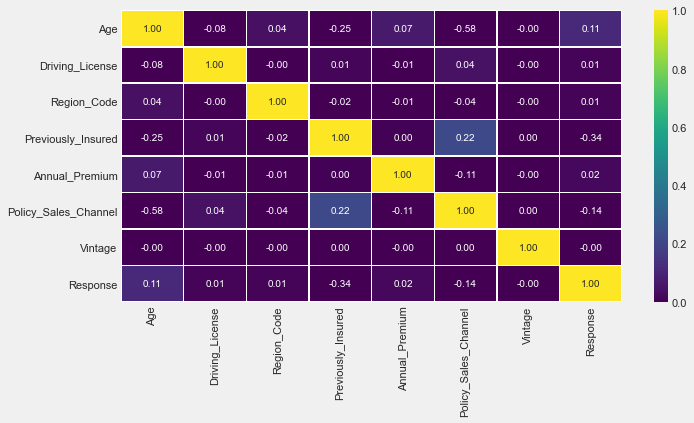

In [54]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis');

### Skewness of Continuous Variables

If a column in the dataset is skewed it affects the model's performance and therefore we might end up with wrong predictions.

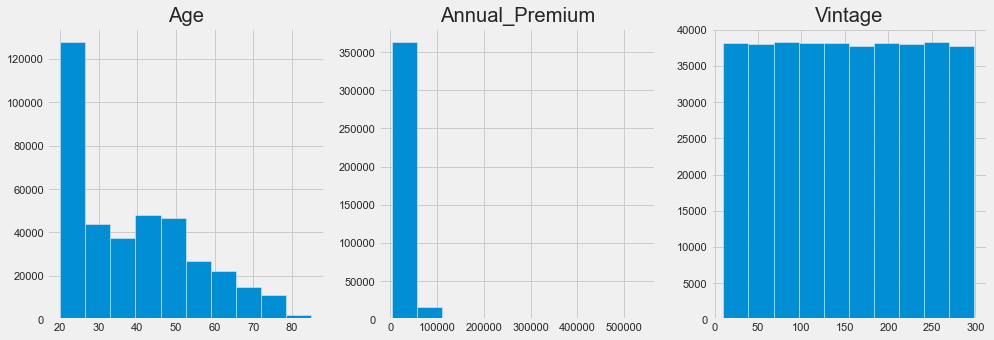

In [55]:
from scipy.stats import skew
skew_data = ['Age', 'Annual_Premium', 'Vintage']

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(train[skew_data[i]])
    plt.title(skew_data[i])

In [56]:
for i in range(3):
    print(skew_data[i],"skewness: {:.3f}".format(skew(train[skew_data[i]])))

Age skewness: 0.672
Annual_Premium skewness: 1.770
Vintage skewness: 0.003


We can say that 'Age' feature is moderately skewed and 'Annual_Premium' feature is highly skewed. With 0.003 skewness value 'Vintage' feature is not skewed.

In [57]:
for i in range(2):
    print(skew_data[i],"after log transformation: {:.3f}".format(skew(np.log(train[skew_data[i]]))))

Age after log transformation: 0.205
Annual_Premium after log transformation: -1.475


In [58]:
for i in range(2):
    print(skew_data[i],"after sqrt transformation: {:.3f}".format(skew(np.sqrt(train[skew_data[i]]))))

Age after sqrt transformation: 0.426
Annual_Premium after sqrt transformation: -0.794


In order to get rid of the skewness we can use various methods. In this case it's better to use square root transformation.

In [59]:
for i in range(2):
    train[skew_data[i]] = np.sqrt(train[skew_data[i]])

In [60]:
df1 = train.copy()

## Outliers

In [61]:
numeric_features = ['Age', 'Annual_Premium', 'Vintage']

In [62]:
def draw_boxplot(df, features):
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size = 5)
    g = g.map(sns.boxplot, "value", orient="v", palette="Blues")
    plt.show()

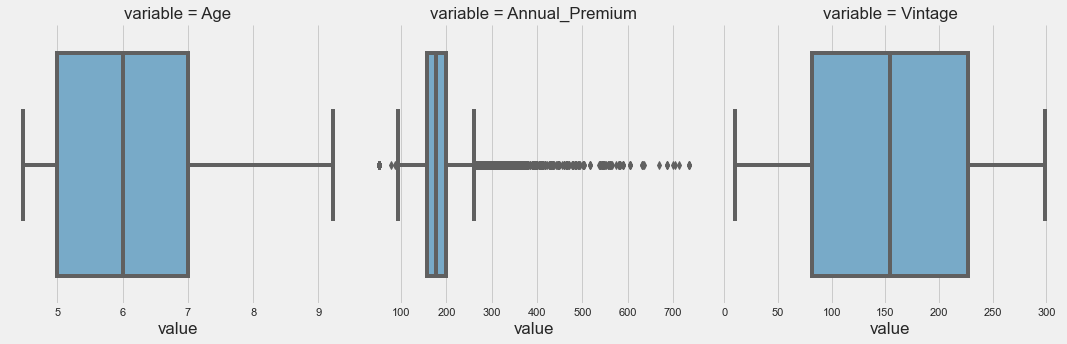

In [63]:
draw_boxplot(train, numeric_features)

In [64]:
from scipy.stats import zscore

def calc_z_scores(col):
    z_scores = zscore(col.dropna())
    for threshold in range(1,5):
        print("Threshold value: {}".format(threshold))
        print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('------')

In [65]:
calc_z_scores(train["Annual_Premium"])

Threshold value: 1
Number of Outliers: 33259
------
Threshold value: 2
Number of Outliers: 2557
------
Threshold value: 3
Number of Outliers: 390
------
Threshold value: 4
Number of Outliers: 174
------


In [66]:
from scipy.stats.mstats import winsorize

train["Annual_Premium"]= winsorize(np.array(train["Annual_Premium"].dropna()), (0.20, 0.10))

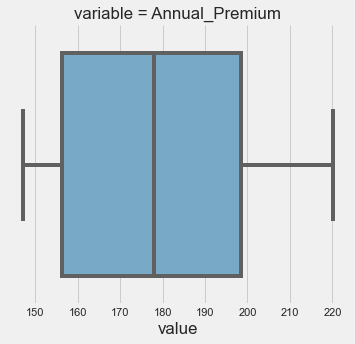

In [67]:
draw_boxplot(train, numeric_features[1])

In [68]:
calc_z_scores(train["Annual_Premium"])

Threshold value: 1
Number of Outliers: 77445
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


## Feature Engineering

In [69]:
train['Region_Code']= train['Region_Code'].astype(int)

### Converting Categorical Columns to Numerical

In [70]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return df.dtypes[df.dtypes == "object"].index

In [71]:
get_uniques(train, get_categorical_columns(train))

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [72]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 0, 'No':1})
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 0, 'No':1})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})

In [73]:
train = pd.get_dummies(train, columns = ['Vehicle_Age'], drop_first=True)
test = pd.get_dummies(test, columns = ['Vehicle_Age'], drop_first=True)

In [74]:
train.rename(columns={"Vehicle_Age_< 1 Year": "1_year_below", "Vehicle_Age_> 2 Years": "2_years_above"}, inplace=True)
test.rename(columns={"Vehicle_Age_< 1 Year": "1_year_below", "Vehicle_Age_> 2 Years": "2_years_above"}, inplace=True)

In [75]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,6.633250,1,28,0,0,201.131798,26,217,1,0,1
1,0,8.717798,1,3,0,1,183.128370,26,183,0,0,0
2,0,6.855655,1,28,0,0,195.688528,26,27,1,0,1
3,0,4.582576,1,11,1,1,169.171511,152,203,0,1,0
4,1,5.385165,1,41,1,1,165.819179,152,39,0,1,0


In [76]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,1_year_below,2_years_above
0,0,25,1,11,1,1,35786.0,152,53,1,0
1,0,40,1,28,0,0,33762.0,7,111,0,0
2,0,47,1,28,0,0,40050.0,124,199,0,0
3,0,24,1,27,1,0,37356.0,152,187,1,0
4,0,27,1,28,1,1,59097.0,152,297,1,0


In [77]:
# from category_encoders import TargetEncoder

# encoder = TargetEncoder()
# train['Region_Code'] = encoder.fit_transform(train['Region_Code'], train['Response'])
# train['Policy_Sales_Channel'] = encoder.fit_transform(train['Policy_Sales_Channel'], train['Response'])

In [78]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,6.633250,1,28,0,0,201.131798,26,217,1,0,1
1,0,8.717798,1,3,0,1,183.128370,26,183,0,0,0
2,0,6.855655,1,28,0,0,195.688528,26,27,1,0,1
3,0,4.582576,1,11,1,1,169.171511,152,203,0,1,0
4,1,5.385165,1,41,1,1,165.819179,152,39,0,1,0


In [79]:
df2 = train.copy()

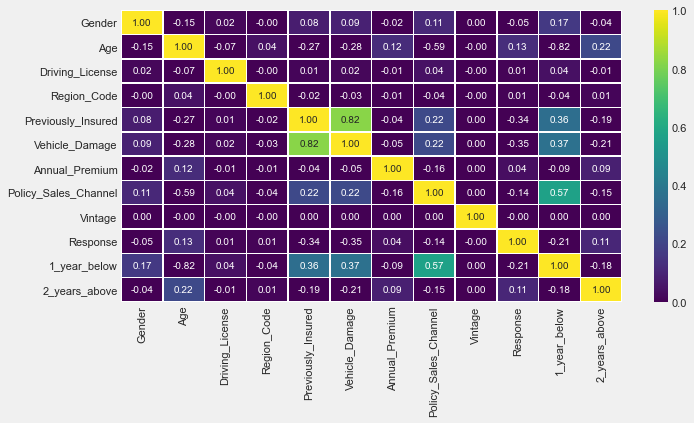

In [80]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis');

In [81]:
corr_list = corr_mat['Response'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

Age                     0.127159
2_years_above           0.109280
Annual_Premium          0.037429
Region_Code             0.010584
Driving_License         0.010161
Vintage                -0.001036
Gender                 -0.052476
Policy_Sales_Channel   -0.139010
1_year_below           -0.209839
Previously_Insured     -0.341201
Vehicle_Damage         -0.354426
Name: Response, dtype: float64

## Principal Components Analysis

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = train.drop('Response', axis=1)
comp = len(X.columns)

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(X_scaled)

In [83]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.27232309 0.12351962 0.09249217 0.09093307 0.09078785 0.08964965
 0.08526382 0.08009992 0.0435271  0.01597455 0.01542915]
[27.23 39.58 48.83 57.92 67.   75.96 84.49 92.5  96.85 98.45 99.99]


The first principal component explains 27.23% of the variation in the original data while the second principal component explains 12.35% of the variation in the original data.

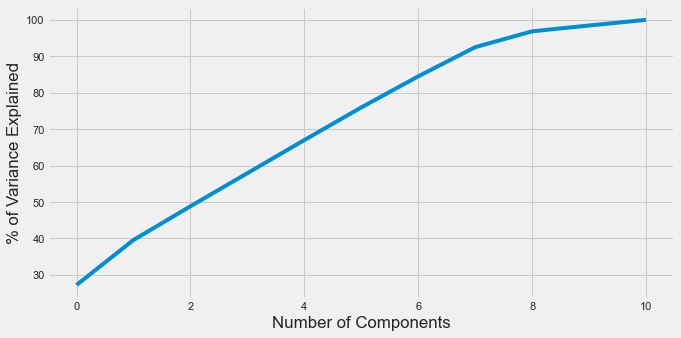

In [84]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.show()

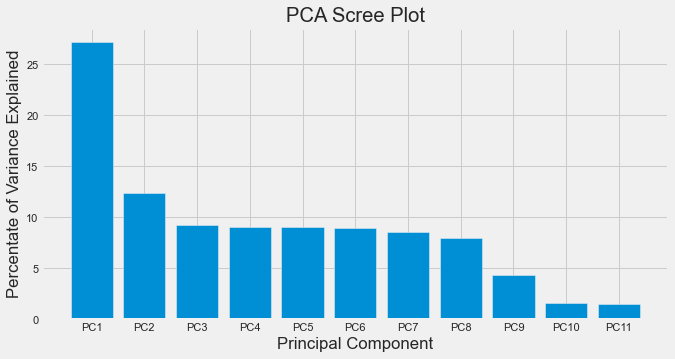

In [85]:
percent_variance = np.round(exp_var * 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [86]:
n_PCA_80 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.8) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.8)
print(n_PCA_80, "components explain 80% of variance.")

6 components explain 80% of variance.


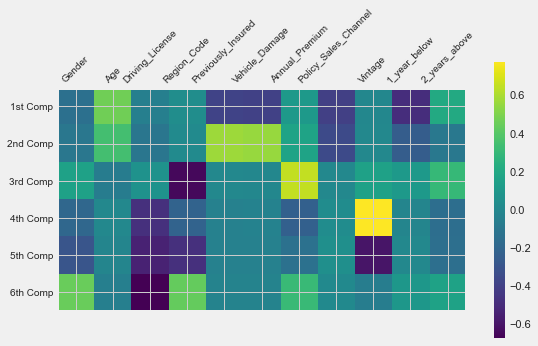

In [87]:
pca = PCA(n_components=n_PCA_80)
principalComponents=pca.fit_transform(X_scaled)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp', '5th Comp', '6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],X,fontsize=10,rotation=45)
plt.tight_layout()
plt.show()

## Preprocessing

In [101]:
features = train.columns
num = ['Age','Annual_Premium','Vintage']
train_prep = train[features]

In [102]:
train_prep.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,6.633250,1,28,0,0,201.131798,26,217,1,0,1
1,0,8.717798,1,3,0,1,183.128370,26,183,0,0,0
2,0,6.855655,1,28,0,0,195.688528,26,27,1,0,1
3,0,4.582576,1,11,1,1,169.171511,152,203,0,1,0
4,1,5.385165,1,41,1,1,165.819179,152,39,0,1,0


In [103]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_prep[num] = std.fit_transform(train_prep[num])

In [104]:
test_prep = test.copy()
test_prep[num] = std.fit_transform(test_prep[num])

In [105]:
train_prep

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,0.429992,1,28,0,0,0.889696,26,0.748838,1,0,1
1,0,2.148358,1,3,0,1,0.159036,26,0.342481,0,0,0
2,0,0.613328,1,28,0,0,0.668783,26,-1.521984,1,0,1
3,0,-1.260450,1,11,1,1,-0.407396,152,0.581514,0,1,0
4,1,-0.598848,1,41,1,1,-0.543449,152,-1.378564,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,2.053170,1,26,1,1,-0.223807,26,-0.792931,0,0,0
381105,0,-0.522959,1,37,1,1,0.845386,152,-0.279008,0,1,0
381106,0,-1.260450,1,30,1,1,0.332315,160,0.079543,0,1,0
381107,1,1.759613,1,14,0,0,1.299419,124,-0.960254,0,0,1


## Split the Target Value

In [106]:
X = train_prep.drop('Response', axis=1)
y = train_prep['Response']

## Balancing The Dataset (Oversampling)

In [107]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=11)

## Clustering

### Mini Batch KMeans

In [112]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

clusterer = MiniBatchKMeans(n_clusters=2, random_state=123, batch_size=100).fit(X_smote)

In [113]:
labels = clusterer.labels_
print("RI Score: {:.2f}".format(metrics.rand_score(y_smote, labels)))
print("ARI Score: {:.2f}".format(metrics.adjusted_rand_score(y_smote, labels)))

RI Score: 0.51
ARI Score: 2.88


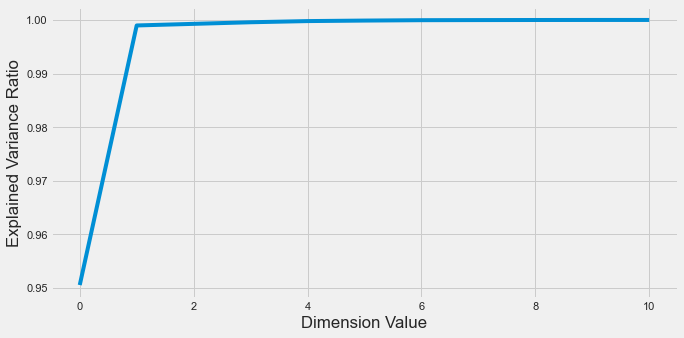

In [114]:
pca= PCA().fit(X_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("Dimension Value")
plt.ylabel("Explained Variance Ratio")
plt.show()

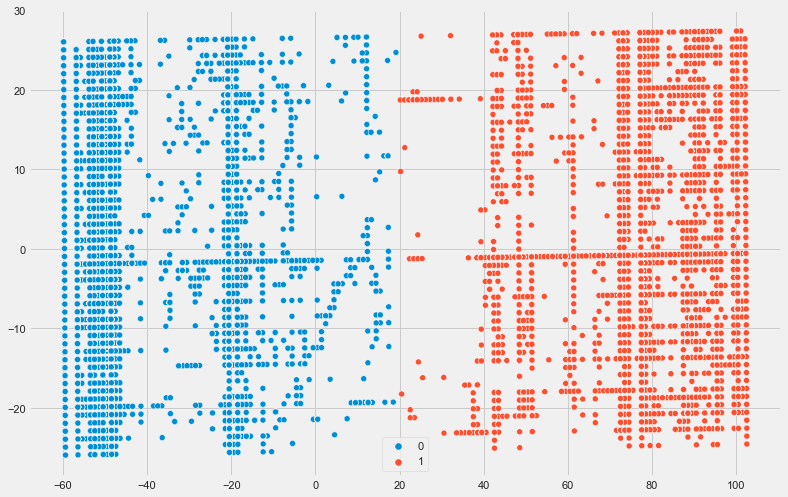

In [115]:
pca_2= PCA(n_components=2)
pca= pca_2.fit_transform(X_smote)
df_pca= pd.DataFrame(pca, columns={"D_1", "D_2"})

plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=clusterer.labels_)
plt.show()

### Gaussian Mixture Model

In [116]:
from sklearn.mixture import GaussianMixture as GMM
 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_smote) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,77.372428,-0.810293
1,77.168285,24.186491


In [117]:
gmm = GMM(n_components = 2) 
gmm.fit(X_principal)

GaussianMixture(n_components=2)

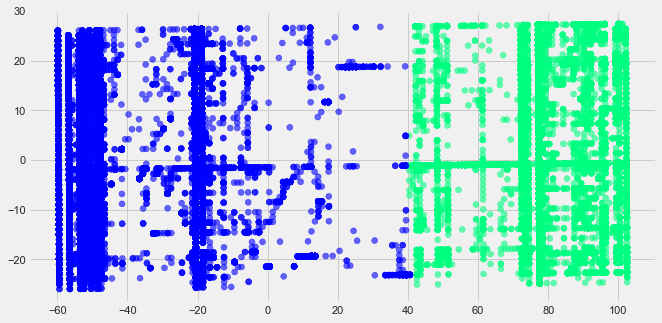

In [118]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GMM(n_components = 2, random_state=123).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

In [119]:
gmm = GMM(n_components=2, tol=0.01, random_state=11).fit(X_smote)
labels = gmm.predict(X_smote)

In [120]:
print("RI Score: {:.2f}".format(metrics.rand_score(y_smote, labels)))
print("ARI Score: {:.2f}".format(metrics.adjusted_rand_score(y_smote, labels)))

RI Score: 0.51
ARI Score: -1.32


## Defining Functions

In [121]:
classes = ['not interested', 'interested']

In [122]:
from yellowbrick.classifier import ClassificationReport

def class_report(model):
    visualizer = ClassificationReport(model, classes=classes, cmap='GnBu')
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    g = visualizer.poof()

In [123]:
from yellowbrick.classifier import ClassPredictionError

def class_pred_error(model):
    visualizer = ClassPredictionError(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [124]:
from yellowbrick.classifier import ConfusionMatrix

def plot_confusion_matrix(model):
    cm = ConfusionMatrix(model, classes=classes, cmap='RdPu')
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

In [125]:
from yellowbrick.classifier import ROCAUC

def plot_roc_auc(model):
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [126]:
from yellowbrick.classifier import PrecisionRecallCurve

def plot_pr_curve(model):
    pr_curve = PrecisionRecallCurve(model,
             classes=classes,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))
    pr_curve.fit(X_train, y_train)
    pr_curve.score(X_test, y_test)
    pr_curve.show();

In [318]:
def print_score(model):
    pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)
    print("Train Accuracy: {:.2f}%".format(train_acc * 100))
        
    pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test)
    print("Test Accuracy: {:.2f}%".format(test_acc * 100))
    
    return train_acc, test_acc

In [319]:
def model_evaluate(model):
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    return acc_train, acc_test

In [156]:
def get_results(param_names, results):
    df_results = pd.DataFrame(results)
    df_results = df_results[param_names]
    df_results = df_results.sort_values(by='mean_test_score', ascending = False)
    display(df_results.head(10))

## Modeling

## 1. Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train, y_train)

accuracy_train_logreg, accuracy_test_logreg = model_evaluate(log_reg)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_logreg)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_logreg))

Accuracy on Train Data : 0.789
Accuracy on Test Data  : 0.790


### Logistic Regression Hyperparameter Tuning

In [324]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [1e-06, 1e-05, 1e-04],
              "penalty": ['l1','l2'],
              "max_iter":[80, 100, 120, 150],
              "solver":['newton-cg', 'lbfgs', 'liblinear']
             }

grid_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_penalty','param_C', 'param_max_iter', 'param_solver','mean_test_score']

get_results(param_names, results)

,param_penalty,param_C,param_max_iter,param_solver,mean_test_score
52,l2,0.0001,80,lbfgs,0.793200
71,l2,0.0001,150,liblinear,0.792705
65,l2,0.0001,120,liblinear,0.792705
53,l2,0.0001,80,liblinear,0.792705
59,l2,0.0001,100,liblinear,0.792705
58,l2,0.0001,100,lbfgs,0.792523
64,l2,0.0001,120,lbfgs,0.792381
69,l2,0.0001,150,newton-cg,0.792043
57,l2,0.0001,100,newton-cg,0.792043
51,l2,0.0001,80,newton-cg,0.792043


In [325]:
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

lr_clf = LogisticRegression(**best_params, random_state=123)
lr_clf.fit(X_train, y_train)

test_prediction_proba = lr_clf.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_lr = lr_clf.predict(X_test)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)

lr_train_acc, lr_test_acc = print_score(lr_clf)

Best parameters:  {'C': 0.0001, 'max_iter': 80, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy: 79.32%
Test Accuracy: 79.27%


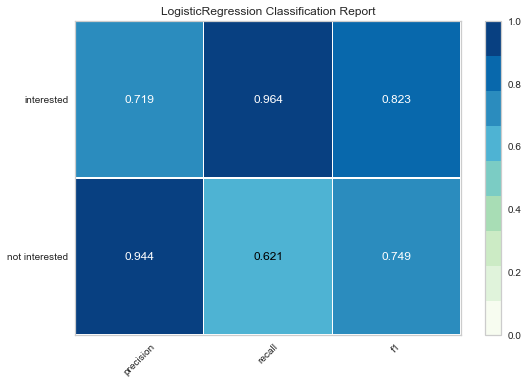

In [326]:
class_report(lr_clf)

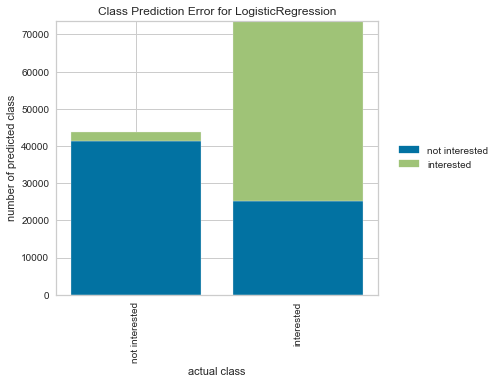

In [327]:
class_pred_error(lr_clf)

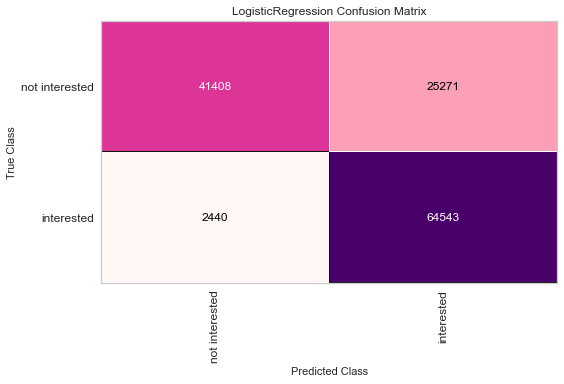

In [328]:
plot_confusion_matrix(lr_clf)

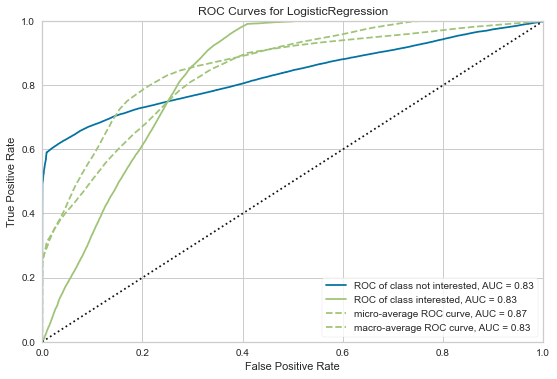

In [329]:
plot_roc_auc(lr_clf)

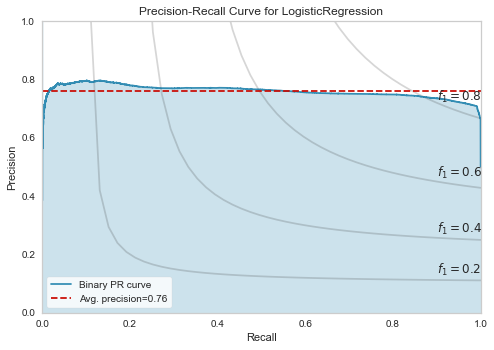

In [330]:
plot_pr_curve(lr_clf)

In [342]:
columns = ['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Score', 'Precision', 'Recall']
tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", lr_train_acc, lr_test_acc, lr_auc, lr_precision, lr_recall]], 
                          columns=columns)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.71863,0.963573


## 2. Decision Tree

In [343]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(X_train, y_train)

accuracy_train_decisiontree, accuracy_test_decisiontree = model_evaluate(decision_tree)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_decisiontree)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_decisiontree))

Accuracy on Train Data : 0.999
Accuracy on Test Data  : 0.893


### Decision Tree Hyperparameter Tuning

In [344]:
parameters = {"criterion": ['gini', 'entropy'],
              "splitter": ['best', 'random'],
              "max_depth": [20, 25],
              "min_samples_split":[2, 3, 4],
              "min_samples_leaf": [1, 2, 3],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=decision_tree, param_grid = parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_criterion','param_splitter', 'param_max_depth', 'param_min_samples_split','param_min_samples_leaf',
               'param_max_features','mean_test_score']

In [345]:
get_results(param_names, results)

,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score
162,entropy,best,25,2,1,auto,0.840875
180,entropy,best,25,2,1,sqrt,0.840875
198,entropy,best,25,2,1,log2,0.840875
182,entropy,best,25,3,1,sqrt,0.839943
164,entropy,best,25,3,1,auto,0.839943
200,entropy,best,25,3,1,log2,0.839943
58,gini,best,25,4,1,auto,0.839504
94,gini,best,25,4,1,log2,0.839504
76,gini,best,25,4,1,sqrt,0.839504
90,gini,best,25,2,1,log2,0.839279


In [346]:
best_params = grid_cv.best_params_
print('Best_params: ',best_params)

dt_clf = DecisionTreeClassifier(**best_params, random_state=123)
dt_clf.fit(X_train, y_train)

test_prediction_proba = dt_clf.predict_proba(X_test)[:,1]
dt_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_dt = dt_clf.predict(X_test)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

dt_train_acc, dt_test_acc = print_score(dt_clf)

Best_params:  {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Accuracy: 88.58%
Test Accuracy: 84.24%


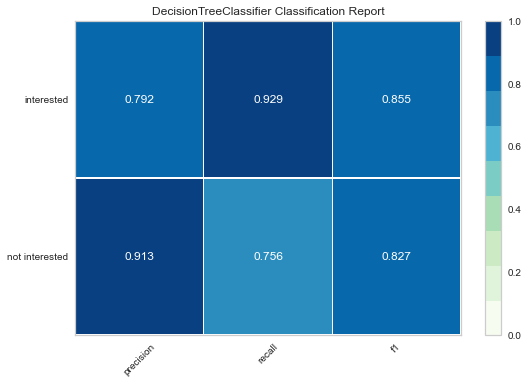

In [347]:
class_report(dt_clf)

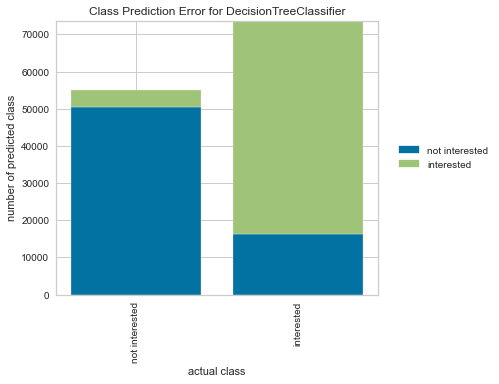

In [348]:
class_pred_error(dt_clf)

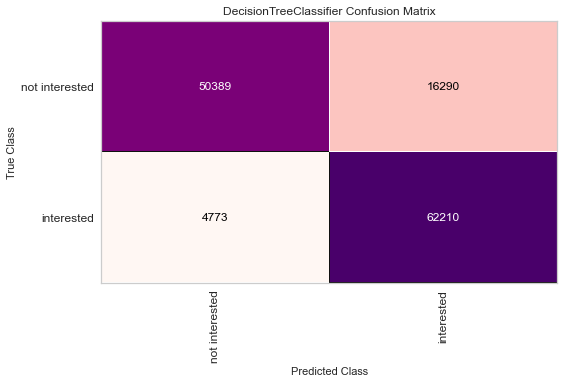

In [349]:
plot_confusion_matrix(dt_clf)

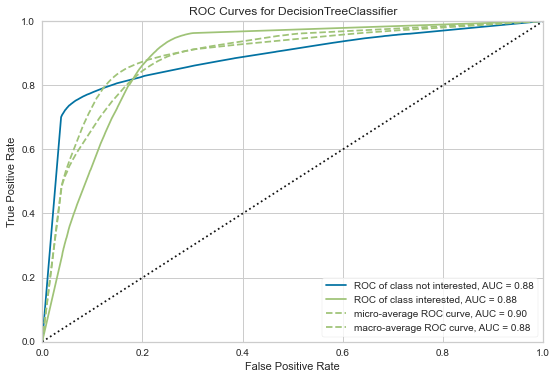

In [350]:
plot_roc_auc(dt_clf)

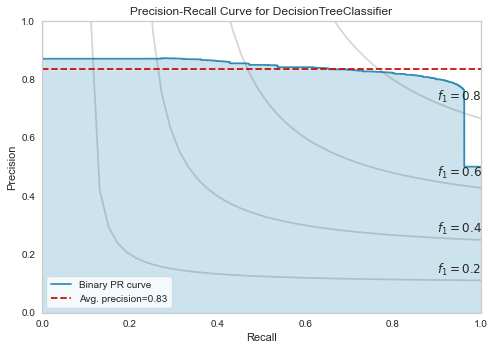

In [351]:
plot_pr_curve(dt_clf)

In [352]:
results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree", dt_train_acc, dt_test_acc, dt_auc, dt_precision, dt_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.718630,0.963573
1,Tuned Decision Tree,0.885813,0.842416,0.882728,0.792484,0.928743


## 3. Random Forest

In [353]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train)

accuracy_train_randomforest, accuracy_test_randomforest = model_evaluate(random_forest)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_randomforest)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_randomforest))

Accuracy on Train Data : 0.999
Accuracy on Test Data  : 0.904


### Random Forest Hyperparameter Tuning

In [359]:
parameters = {"n_estimators": [40,41],
              "criterion": ['gini', 'entropy'],
              "max_depth":[20, 21],
              "min_samples_split":[3, 4],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=random_forest, param_grid = parameters, cv = 3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split','param_max_features','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_criterion,param_max_depth,param_min_samples_split,param_max_features,mean_test_score
12,40,gini,21,3,auto,0.852660
20,40,gini,21,3,log2,0.852660
16,40,gini,21,3,sqrt,0.852660
13,41,gini,21,3,auto,0.852628
21,41,gini,21,3,log2,0.852628
17,41,gini,21,3,sqrt,0.852628
22,40,gini,21,4,log2,0.851695
18,40,gini,21,4,sqrt,0.851695
14,40,gini,21,4,auto,0.851695
19,41,gini,21,4,sqrt,0.851643


In [360]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

rf_clf = RandomForestClassifier(**best_params, random_state=123)
rf_clf.fit(X_train, y_train)

test_prediction_proba = rf_clf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_rf = rf_clf.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

rf_train_acc, rf_test_acc = print_score(rf_clf)

Best parameters:  {'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 40}
Train Accuracy: 87.93%
Test Accuracy: 85.52%


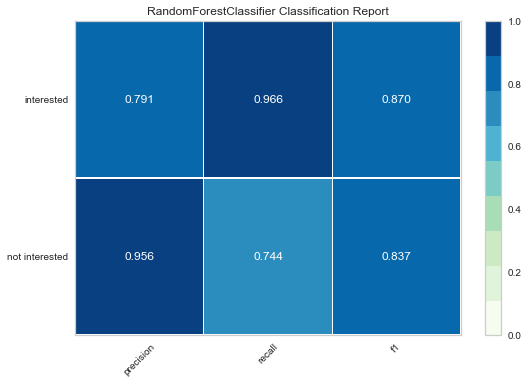

In [361]:
class_report(rf_clf)

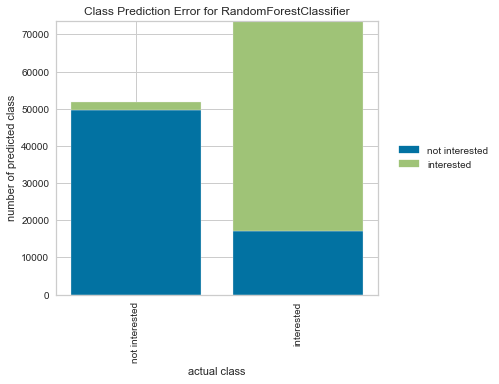

In [362]:
class_pred_error(rf_clf)

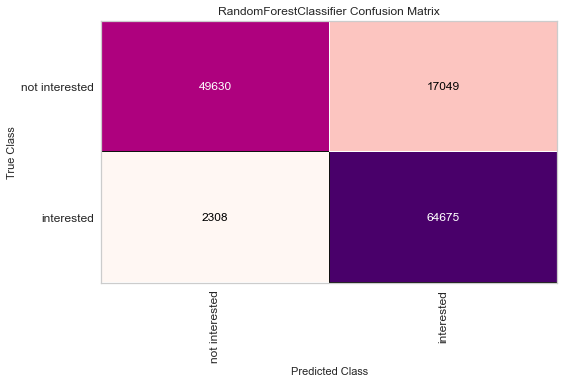

In [363]:
plot_confusion_matrix(rf_clf)

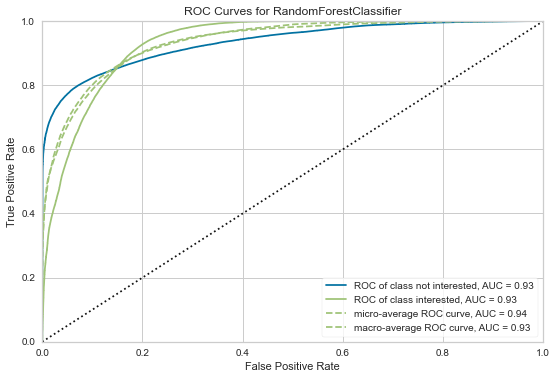

In [364]:
plot_roc_auc(rf_clf)

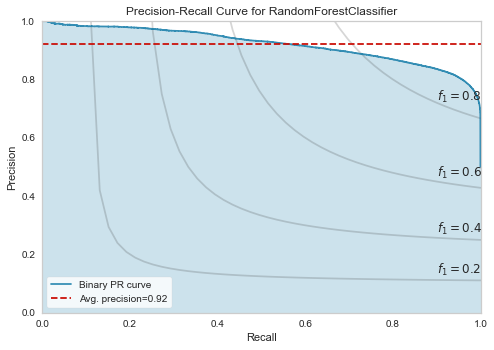

In [365]:
plot_pr_curve(rf_clf)

In [366]:
results_df_2 = pd.DataFrame(data=[["Tuned Random Forest", rf_train_acc, rf_test_acc, rf_auc, rf_precision, rf_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.718630,0.963573
1,Tuned Decision Tree,0.885813,0.842416,0.882728,0.792484,0.928743
2,Tuned Random Forest,0.879272,0.855179,0.933505,0.791383,0.965543


## 4. XGBoost

In [367]:
from xgboost.sklearn import XGBClassifier

xgboost = XGBClassifier(objective="reg:logistic", seed=11)
xgboost.fit(X_train, y_train)

accuracy_train_xgb, accuracy_test_xgb = model_evaluate(xgboost)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_xgb)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_xgb))

Accuracy on Train Data : 0.897
Accuracy on Test Data  : 0.892


### XGBoost Hyperparameter Tuning

In [369]:
parameters = {"n_estimators": [200, 220],
              "max_depth": [6, 7],
              "learning_rate":[0.3, 0.4]
             }

grid_cv = GridSearchCV(estimator=xgboost, param_grid=parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_max_depth', 'param_learning_rate','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_max_depth,param_learning_rate,mean_test_score
7,220,7,0.4,0.916854
6,200,7,0.4,0.914912
5,220,6,0.4,0.914435
4,200,6,0.4,0.911577
3,220,7,0.3,0.908749
2,200,7,0.3,0.906507
1,220,6,0.3,0.906366
0,200,6,0.3,0.903765


In [370]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

xgb_clf = XGBClassifier(**best_params, verbosity=0, random_state=123)
xgb_clf.fit(X_train, y_train)

test_prediction_proba = xgb_clf.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_xgb = xgb_clf.predict(X_test)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

xgb_train_acc, xgb_test_acc = print_score(xgb_clf)

Best parameters:  {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 220}
Train Accuracy: 93.28%
Test Accuracy: 91.75%


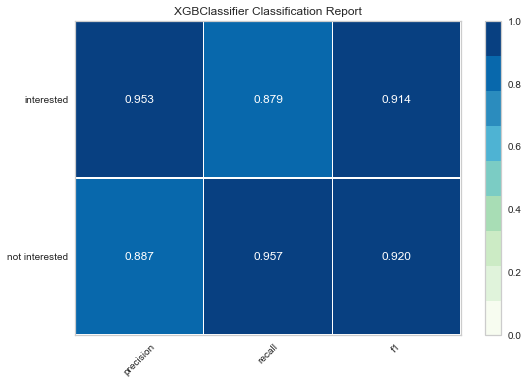

In [371]:
class_report(xgb_clf)

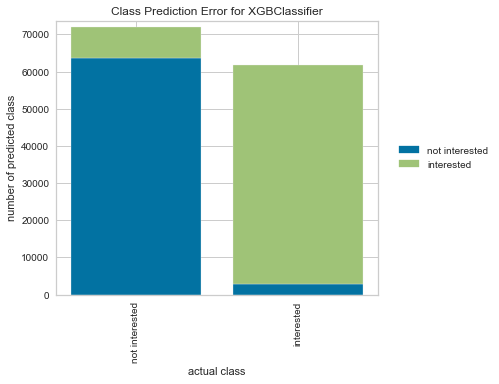

In [372]:
class_pred_error(xgb_clf)

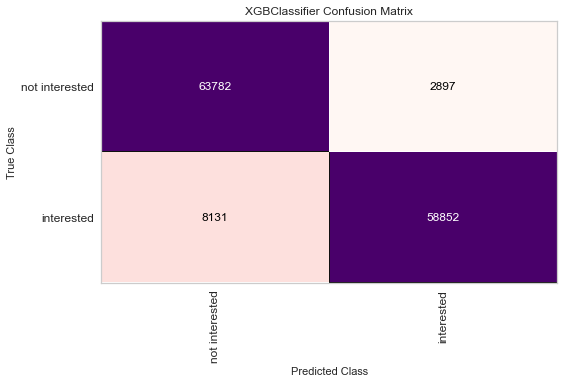

In [373]:
plot_confusion_matrix(xgb_clf)

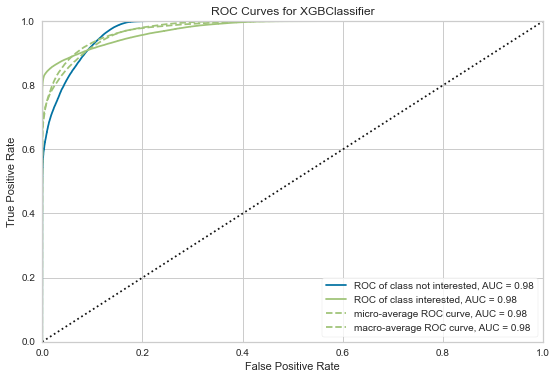

In [374]:
plot_roc_auc(xgb_clf)

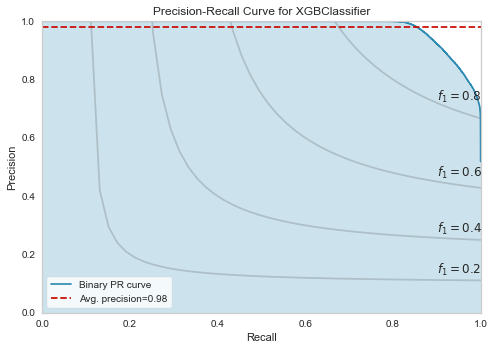

In [375]:
plot_pr_curve(xgb_clf)

In [376]:
results_df_2 = pd.DataFrame(data=[["Tuned XGBoost", xgb_train_acc, xgb_test_acc, xgb_auc, xgb_precision, xgb_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.718630,0.963573
1,Tuned Decision Tree,0.885813,0.842416,0.882728,0.792484,0.928743
2,Tuned Random Forest,0.879272,0.855179,0.933505,0.791383,0.965543
3,Tuned XGBoost,0.932797,0.917493,0.977575,0.953084,0.878611


## 7. Light GBM

In [377]:
import lightgbm as lgb

light_gbm = lgb.LGBMClassifier(random_state=123)
light_gbm.fit(X_train, y_train)

accuracy_train_lightgbm, accuracy_test_lightgbm = model_evaluate(light_gbm)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_lightgbm)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_lightgbm))

Accuracy on Train Data : 0.866
Accuracy on Test Data  : 0.864


### Light GBM Hyperparameter Tuning

In [378]:
parameters = {"n_estimators": [400,450,500],
              "max_depth": [-1],
              "num_leaves": [150, 160],
              "min_child_samples":[70, 75]
             }

grid_cv = GridSearchCV(estimator=light_gbm, param_grid = parameters, cv = 3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_num_leaves','param_min_child_samples','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_num_leaves,param_min_child_samples,mean_test_score
5,500,160,70,0.886596
11,500,160,75,0.886417
10,500,150,75,0.886142
3,450,160,70,0.886052
9,450,160,75,0.886005
4,500,150,70,0.885873
8,450,150,75,0.885564
7,400,160,75,0.885326
1,400,160,70,0.885323
2,450,150,70,0.885313


In [379]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

lgbm_clf = lgb.LGBMClassifier(**best_params, random_state=123)
lgbm_clf.fit(X_train, y_train)

test_prediction_proba = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_lgbm = lgbm_clf.predict(X_test)
lgbm_precision = precision_score(y_test, y_pred_lgbm)
lgbm_recall = recall_score(y_test, y_pred_lgbm)

lgbm_train_acc, lgbm_test_acc = print_score(lgbm_clf)

Best parameters:  {'max_depth': -1, 'min_child_samples': 70, 'n_estimators': 500, 'num_leaves': 160}
Train Accuracy: 92.47%
Test Accuracy: 89.10%


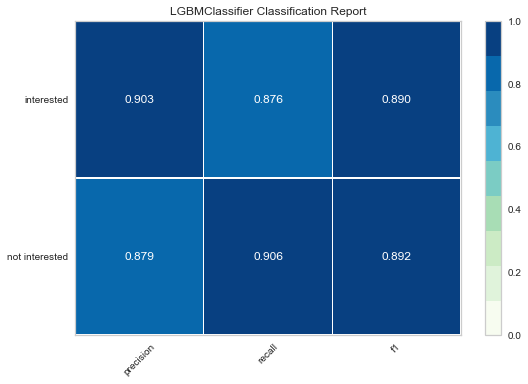

In [380]:
class_report(lgbm_clf)

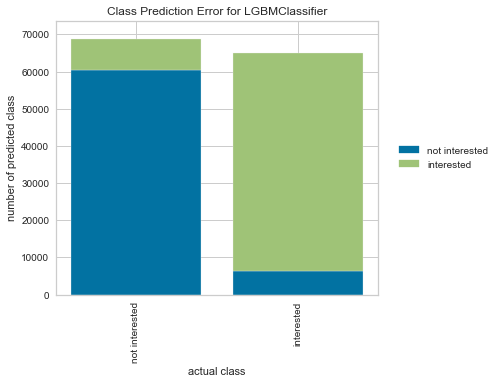

In [381]:
class_pred_error(lgbm_clf)

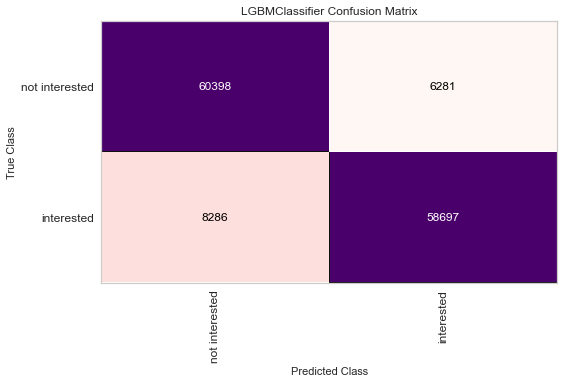

In [382]:
plot_confusion_matrix(lgbm_clf)

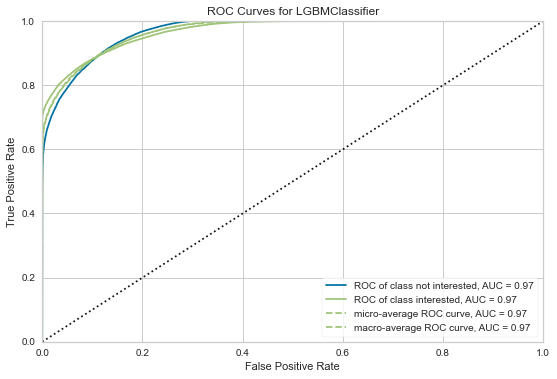

In [383]:
plot_roc_auc(lgbm_clf)

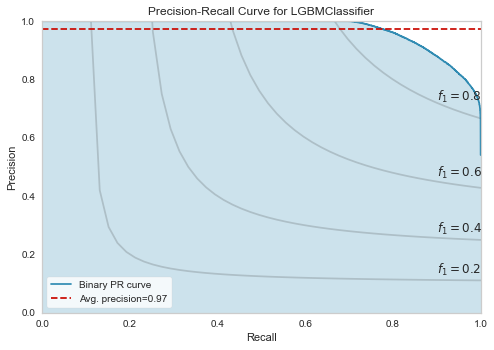

In [384]:
plot_pr_curve(lgbm_clf)

In [385]:
results_df_2 = pd.DataFrame(data=[["Tuned Light GBM", lgbm_train_acc, lgbm_test_acc, lgbm_auc, lgbm_precision, lgbm_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

In [386]:
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.718630,0.963573
1,Tuned Decision Tree,0.885813,0.842416,0.882728,0.792484,0.928743
2,Tuned Random Forest,0.879272,0.855179,0.933505,0.791383,0.965543
3,Tuned XGBoost,0.932797,0.917493,0.977575,0.953084,0.878611
4,Tuned Light GBM,0.924679,0.891016,0.969088,0.903337,0.876297


## Artifical Neural Network

In [387]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

input_number = X_train.shape[1] 

In [388]:
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape = (input_number,), name = "Hidden_Layer_1"))
model_ann.add(BatchNormalization())
model_ann.add(Dense(32, activation='relu', name = "Hidden_Layer_2"))
model_ann.add(Dense(8, activation='relu', name = "Hidden_Layer_3"))
model_ann.add(Dense(1, activation='sigmoid', name = "Output"))
model_ann.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 64)                768       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 32)                2080      
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 8)                 264       
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 3,377
Trainable params: 3,249
Non-trainable params: 128
_________________________________________________________________


In [389]:
model_ann.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy', 'AUC', 'Precision', 'Recall'])

In [390]:
model_ann.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)

In [392]:
train_result = model_ann.evaluate(X_train, y_train, verbose = 0)
ann_train_acc = train_result[1]
ann_train_auc = train_result[2]
ann_train_precision = train_result[3]
ann_train_recall = train_result[4]
ann_test_acc = model_ann.evaluate(X_test, y_test, verbose = 0)[1]

In [393]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", ann_train_acc, ann_test_acc, ann_train_auc, ann_train_precision, ann_train_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

## Models Summary

In [394]:
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.793163,0.792679,0.832468,0.718630,0.963573
1,Tuned Decision Tree,0.885813,0.842416,0.882728,0.792484,0.928743
2,Tuned Random Forest,0.879272,0.855179,0.933505,0.791383,0.965543
3,Tuned XGBoost,0.932797,0.917493,0.977575,0.953084,0.878611
4,Tuned Light GBM,0.924679,0.891016,0.969088,0.903337,0.876297
5,Artificial Neural Network,0.808057,0.807110,0.865173,0.754788,0.912270


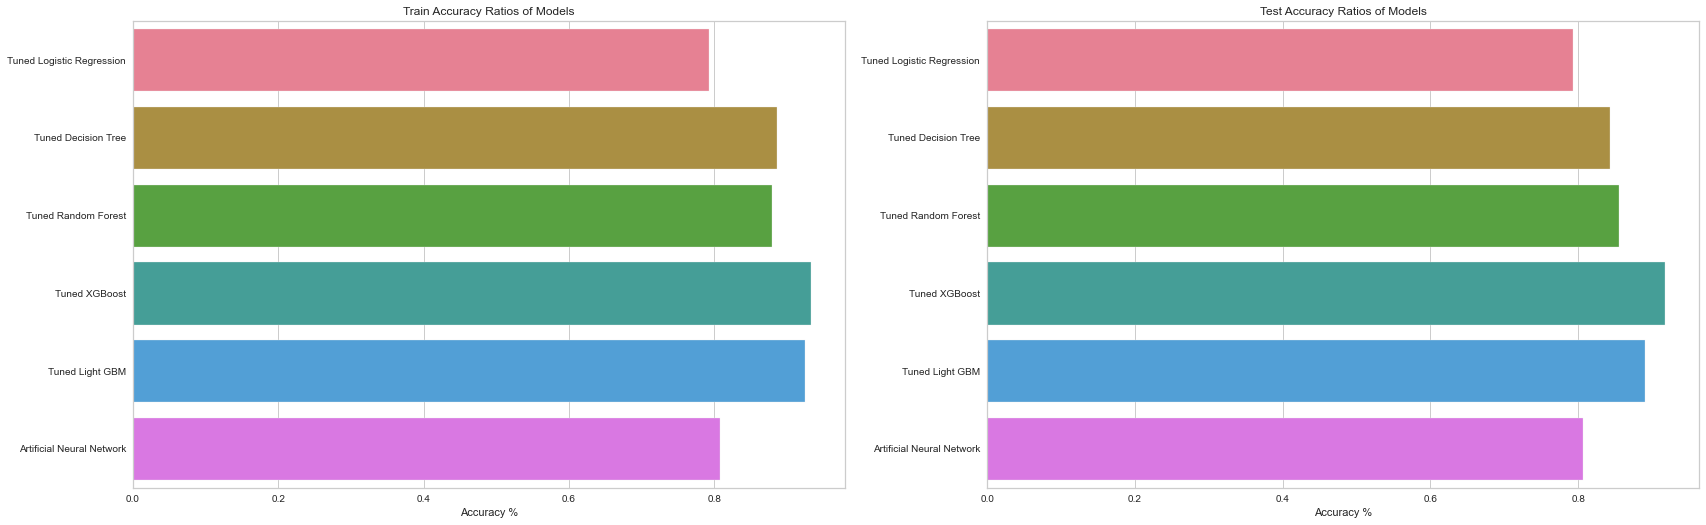

In [395]:
plt.figure(figsize=(25, 8))
plt.subplot(121)
sns.barplot(x = 'Training Accuracy', y = 'Model', data=tuning_results_df, palette='husl')
plt.xlabel('Accuracy %')
plt.ylabel('')
plt.title('Train Accuracy Ratios of Models')
plt.subplot(122)
sns.barplot(x = 'Testing Accuracy', y = 'Model', data=tuning_results_df, palette='husl')
plt.xlabel('Accuracy %')
plt.ylabel('')
plt.title('Test Accuracy Ratios of Models')
plt.show()